# Generations in The Mexican Chamber of Deputies by state

The objective of this brief analysis is to provide the reader an approach to mexican politics by using the data from government. We will extract some information about the mexican deputies and use it to visualize the generations in the Chamber of Deputies by state.

## Data acquisition

The data showed here was extracted from http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=127 using the following libraries:

In [1]:
import pandas as pd
import numpy as np
import requests
from requests import get
from bs4 import BeautifulSoup, NavigableString

We can use a variable to save as a string the page that insterest us:

In [2]:
url_1 = "http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=127"

We are going to use the *requests* library to download the page using the *requests.get* method:

In [3]:
response = requests.get(url_1)

We can save in a variable the HTML content of the page using the content property:

In [4]:
html_doc = response.content

 The next step is to create an instance of the BeautifulSoup class to parse our document:

In [5]:
soup = BeautifulSoup(html_doc, 'html.parser')

We want to extract only especific information and not the complete information of the page, so we are going to use the *find_all* method, which will find all the instances of a tag on a page. Note that *find_all* returns a list, so we’ll have to loop through, or use list indexing, it to extract text. For example, we can get the name of the deputy and save it in the variable *cad* with the following code:

In [6]:
cad=soup.find_all('td', {'class': 'textocurrienc'})[0].get_text(strip=True)
cad

'Dip. Dionicia Vázquez García'

Now, we are goint to try to extract the information of the principal main table of the page. We are using both, the class and the width to identify the information we want to extract.

In [7]:
data = soup.find_all('td', {'class': 'textocurri','width' :'470'})

Then, we can create an empty list named *tabla_princ* and append the name of the deputy:

In [8]:
tabla_princ= []
tabla_princ.append(cad)

We need to use a loop to append the rest of the information from the main table to the list *tabla_princ*:

In [9]:
for i in range(len(data)):
        tabla_princ.append(data[i].get_text(strip=True))
tabla_princ

['Dip. Dionicia Vázquez García',
 'Mayoría Relativa',
 'México|Distrito:2|H-283',
 'dionicia.vazquez@diputados.gob.mxExtensión:62058',
 '29-marzo-1948',
 'Elena Laura Flores Martínez']

We need to clean this list before saving the data in a dataframe. To separate the part'México|Distrito:2|H-283', we need to do:

In [10]:
tabla_princ.extend(tabla_princ[2].split("|"))
tabla_princ

['Dip. Dionicia Vázquez García',
 'Mayoría Relativa',
 'México|Distrito:2|H-283',
 'dionicia.vazquez@diputados.gob.mxExtensión:62058',
 '29-marzo-1948',
 'Elena Laura Flores Martínez',
 'México',
 'Distrito:2',
 'H-283']

We can also eliminate the word 'Extensión' by doing:

In [11]:
tabla_princ.extend( tabla_princ[3].split('Extensión:'))
tabla_princ

['Dip. Dionicia Vázquez García',
 'Mayoría Relativa',
 'México|Distrito:2|H-283',
 'dionicia.vazquez@diputados.gob.mxExtensión:62058',
 '29-marzo-1948',
 'Elena Laura Flores Martínez',
 'México',
 'Distrito:2',
 'H-283',
 'dionicia.vazquez@diputados.gob.mx',
 '62058']

Now, we can clean the list by using the metod *.pop()*

In [12]:
tabla_princ.pop(2)
tabla_princ.pop(2)
tabla_princ

['Dip. Dionicia Vázquez García',
 'Mayoría Relativa',
 '29-marzo-1948',
 'Elena Laura Flores Martínez',
 'México',
 'Distrito:2',
 'H-283',
 'dionicia.vazquez@diputados.gob.mx',
 '62058']

Now, it is time to put all the clean data in a dataframe as a row. For this, the first we need is to create and empty dataframe to save the information of the deputy number 127. We can name the columns with the same name that was in the page and then use the *.loc[]* with the number of row (1) to assign the information of the list *tabla_princ* to the first row of the data frame:

In [13]:
df_deputy127=pd.DataFrame(columns=['nombre', 'tipo_elec', 'onomastico', 'suplente', 'edo', 'ent', 'ent_2', 'correo', 'ext'])
df_deputy127.loc[1]=tabla_princ
df_deputy127

,nombre,tipo_elec,onomastico,suplente,edo,ent,ent_2,correo,ext
1,Dip. Dionicia Vázquez García,Mayoría Relativa,29-marzo-1948,Elena Laura Flores Martínez,México,Distrito:2,H-283,dionicia.vazquez@diputados.gob.mx,62058


Now that we completed and understood the process of extracting information from a single deputy, it is time to put all in a loop to extract the information of the 500 deputies.There is a single page for each of the 500 deputies, so we will repeat the previous steps using a *for*. For this task, we need to create an arange using numpy from 1 to 501 with steps of 1. We also need to create the dataframe in wich we will save the data.

In [40]:
pages = np.arange(1, 501, 1)
nombre=[]
df_all_deputies=pd.DataFrame(columns=['nombre', 'tipo_elec', 'onomastico', 'suplente', 'edo', 'ent', 'ent_2', 'correo', 'ext'])
df_all_deputies

,nombre,tipo_elec,onomastico,suplente,edo,ent,ent_2,correo,ext


It is important to notice that the last characters in the url are what allow us to navigate between the profile of each deputy and we can use the function *str()* to convert the int elements of the *pages* arange to string and use it to navigate in each of the 500 deputies' profiles. 
Because of the amount of data, the next code can take some hours to complete the task:

In [ ]:
for page in pages:
    response = requests.get("http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=" +str(page))
    html_doc = response.content
    soup = BeautifulSoup(html_doc, 'html.parser')

    cad=soup.find_all('td', {'class': 'textocurrienc'})[0].get_text(strip=True)
    data = soup.find_all('td', {'class': 'textocurri','width' :'470'})
    
    tabla_princ= []

    tabla_princ.append(cad)
    for i in range(len(data)):
            tabla_princ.append(data[i].get_text(strip=True))   
    
    tabla_princ.extend(tabla_princ[2].split("|"))
    tabla_princ.extend( tabla_princ[3].split('Extensión:'))
    
    tabla_princ.pop(2)
    tabla_princ.pop(2)
        
    i=len(df_all_deputies)+1
    df_all_deputies.loc[i]=tabla_princ

Finally, we need to save our final data frame in a cvs file:

In [ ]:
df_all_deputies.to_csv(r'C:\Users\Marlen\Documents\A.Marlen\A.datalab\tabla_pinc_dip.csv', index=False,header=True )

##  Data processing

The goal is to create a visualization that relates the year of birth and state of people in Mexican Chamber of Deputies, to this porpuse, the following new libraries where used to processing the data:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

The first step is reading the data from the csv file that were created previously:

In [25]:
data = pd.read_csv('tabla_princ_dip.csv')
data.head()

,nombre,tipo_elec,onomastico,suplente,edo,ent,ent_2,correo,ext
0,Dip. Francisco Javier Luevano Nunez,Mayoria Relativa,01-jul-79,Gustavo Armendariz Viramontes,Aguascalientes,Distrito:1,H-249,francisco.luevano@diputados.gob.mx,59907
1,Dip. Elba Lorena Torres Diaz (LICENCIA),Mayoria Relativa,15-mar-77,Haydee Hernandez Munoz,Aguascalientes,Distrito:2,H-278,elba.torres@diputados.gob.mx,62100
2,Dip. Martha Elisa Gonzalez Estrada (LICENCIA),Mayoria Relativa,29-ene-77,Claudia Patricia Torres Lopez(en funciones),Aguascalientes,Distrito:3,E-119,elisa.gonzalez@diputados.gob.mx,59911
3,Dip. Jesus Salvador Minor Mora,Mayoria Relativa,01-jun-51,Juan Melendrez Espinoza,Baja California,Distrito:1,L-453,jesus.minor@diputados.gob.mx,61368
4,Dip. Marina del Pilar Avila Olmeda (LICENCIA),Mayoria Relativa,19-oct-85,Martha Lizeth Noriega Galaz(en funciones),Baja California,Distrito:2,K-410,marina.avila@diputados.gob.mx,61372


As mentioned, this analysis will be focused on the feautures of state and date of birth of the deputies. So, a new subset of the data must be generated with only these columns that we can rename as following:

In [26]:
df = data[['nombre', 'edo', 'onomastico']]
df = df.rename(columns={'nombre':'name', 'edo':'state', 'onomastico':'date_birth'})
df.head()

,name,state,date_birth
0,Dip. Francisco Javier Luevano Nunez,Aguascalientes,01-jul-79
1,Dip. Elba Lorena Torres Diaz (LICENCIA),Aguascalientes,15-mar-77
2,Dip. Martha Elisa Gonzalez Estrada (LICENCIA),Aguascalientes,29-ene-77
3,Dip. Jesus Salvador Minor Mora,Baja California,01-jun-51
4,Dip. Marina del Pilar Avila Olmeda (LICENCIA),Baja California,19-oct-85


It is important to remind that the data was from a mexican web page and the column 'date_birth' is a string, not a datetime object and, because it is in spanish, it cannot be converted directly into a datetime object.

In [27]:
for col in df.columns:
    print(col, type(df[col][0]))

name <class 'str'>
state <class 'str'>
date_birth <class 'str'>


We can operate this column as a string and get the year of birth of each deputy by substracting the last two characters of the column 'date_birth' and create a new one called 'year_birth' that can be converted to integer.

In [28]:
df['year_birth'] =  df['date_birth'].str[-2:]
df['year_birth'] = df['year_birth'].astype(int)
df.head()

,name,state,date_birth,year_birth
0,Dip. Francisco Javier Luevano Nunez,Aguascalientes,01-jul-79,79
1,Dip. Elba Lorena Torres Diaz (LICENCIA),Aguascalientes,15-mar-77,77
2,Dip. Martha Elisa Gonzalez Estrada (LICENCIA),Aguascalientes,29-ene-77,77
3,Dip. Jesus Salvador Minor Mora,Baja California,01-jun-51,51
4,Dip. Marina del Pilar Avila Olmeda (LICENCIA),Baja California,19-oct-85,85


Showing the minimun and maximun values of the column 'year_birth' is needed to make the assumption that all deputies were born before 2000 and all the data corresponds to years between 1900-1999.

In [29]:
print( 'oldest date: ', df['year_birth'].min())
print( 'most recent date: ' ,df['year_birth'].max())

oldest date:  33
most recent date:  96


The next step is to create a new column based on the information from 'year_birth'. This new column will have the generation at wich each diputie belongs. The conditions were created from the information of the following site: 

* Gen Z, iGen, or Centennials: Born 1996 – 2015
* Millennials or Gen Y: Born 1977 – 1995
* Generation X: Born 1965 – 1976
* Baby Boomers: Born 1946 – 1964
* Traditionalists or Silent Generation: Born 1945 and before

https://genhq.com/faq-info-about-generations/

To create this new column, it was created a list that contains all the conditions to separate the deputies by their year of birth:

In [30]:
conditions = [
    (df['year_birth'] >= 96),
    (df['year_birth'] >= 77) & (df['year_birth'] <= 95),
    (df['year_birth'] >= 65) & (df['year_birth'] <= 76),
    (df['year_birth'] >= 46) & (df['year_birth'] <= 64),
    (df['year_birth'] <= 45)
    ]

Next, we need to create a list with the values to assign in each condition was created as well:

In [31]:
values = ['Centennial', 'Millenial', 'Gen X', 'Boomer', 'Traditionalist']

Then the new column *gen* is created into the dataframe and *np.select* is used to assign values to it using the two lists as arguments.

In [32]:
df['gen'] = np.select(conditions, values)

It is possible to use the function *unique()* to review that a category was assigned to all of the deputies. If this is the case, we will see a list with only the categories in the list *values*, in other case, we will see an extra category that could be '0'.

In [33]:
df['gen'].unique()

array(['Millenial', 'Boomer', 'Gen X', 'Traditionalist', 'Centennial'],
      dtype=object)

Now, we can display our final data set:

In [35]:
df.head()

,name,state,date_birth,year_birth,gen
0,Dip. Francisco Javier Luevano Nunez,Aguascalientes,01-jul-79,79,Millenial
1,Dip. Elba Lorena Torres Diaz (LICENCIA),Aguascalientes,15-mar-77,77,Millenial
2,Dip. Martha Elisa Gonzalez Estrada (LICENCIA),Aguascalientes,29-ene-77,77,Millenial
3,Dip. Jesus Salvador Minor Mora,Baja California,01-jun-51,51,Boomer
4,Dip. Marina del Pilar Avila Olmeda (LICENCIA),Baja California,19-oct-85,85,Millenial


We can save this cleaned data frame:

In [36]:
df.to_csv(r'C:\Users\62san\Documents\HumanCentDC\cleanedData.csv', index=False,header=True )

## Analysis

Finally, there is a data set that contains all the relevant information needed to perform the analysis. 
To display all the information at once, it is posible to use the Seaborn library. Here, we are using a catplot to display the number of deputies per state that belongs to certain generation.

C:\Users\62san\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


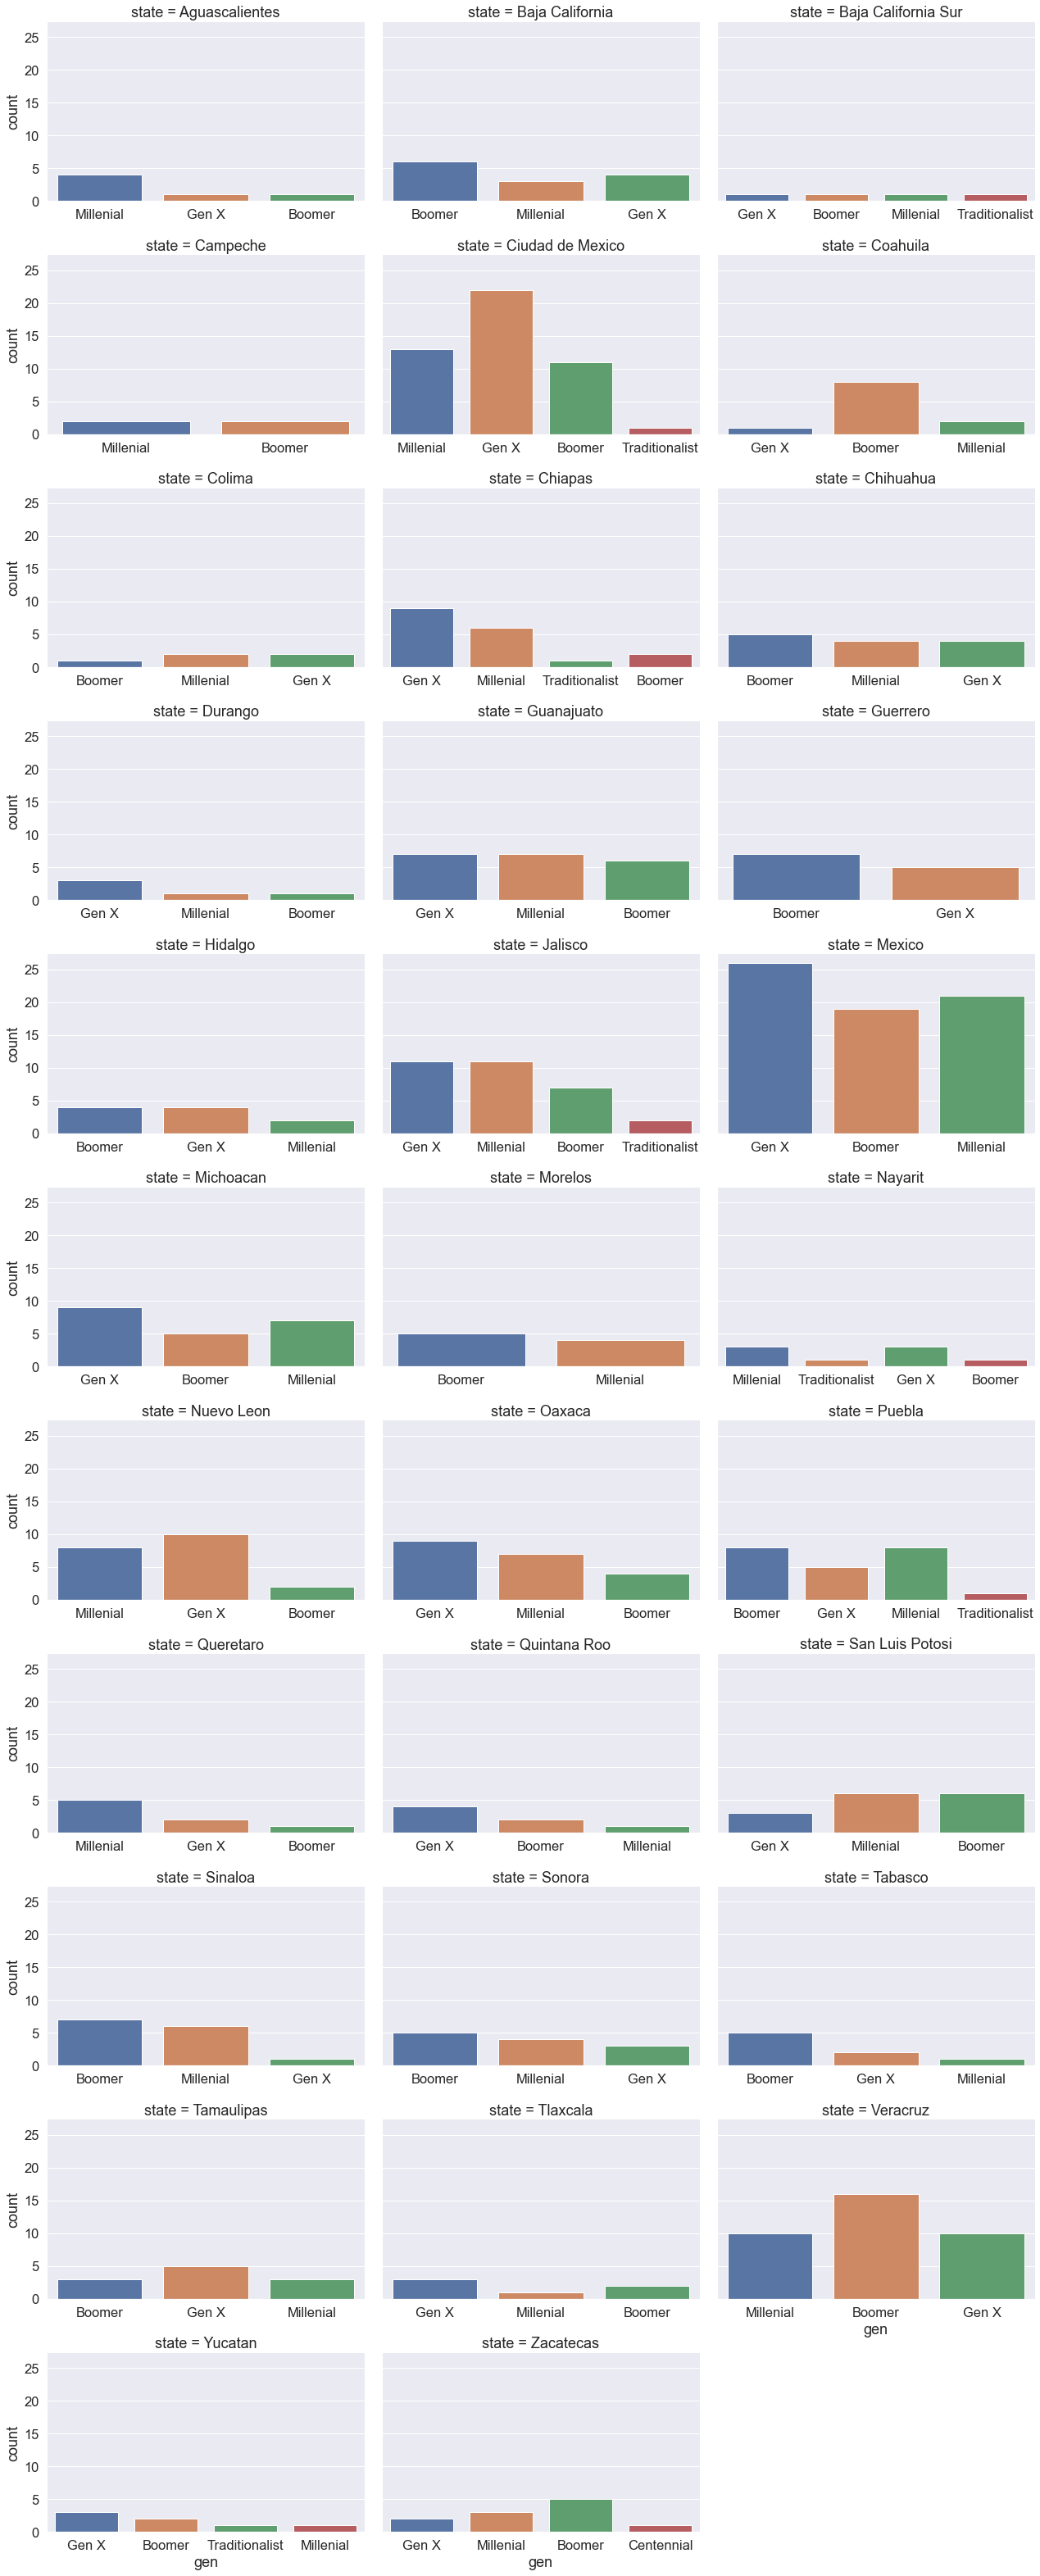

In [101]:
sns.set_theme(style="darkgrid", font_scale= 1.5)
generations_plot= sns.catplot(x="gen", col="state",
                data=df, kind="count", col_wrap=3, height=4, aspect=1.5, sharex=False)
plt.savefig('generations_plot.png')

Some interesting points about the data are:

* Ciudad de Mexico (Mexico City), State of Mexico and Veracruz are the states that have the largest number of deputies in Mexico.
* Most of the deputies of State of Mexico and Mexico City are Gen X.
* The State of Mexico has the largest number of millenial deputies (even larger than Mexico City, the capital of Mexico).
* Baja California Sur is the state with the lower number of deputies.
    